### Introduction

SooToday published a list of the top 25 most circulated books of 2022 compiled by the Sault Ste. Marie Library. Apparently, the article implies that the locals mostly read books made by David Baldacci. To confirm, an analysis will be done on the list of most circulated books

The analysis will be done using JupySQL running DuckDB SQL RDBMS and the results will be visualized using Tableau Public.

Link to Tableau Dashboard:<br>
https://public.tableau.com/app/profile/ryan.enoch/viz/WhataretheSaultitesreading2022/WhataretheSaultitesreading?publish=yes

### Acknowledgement

This Jupyter notebook file uses data compiled by the Sault Ste. Marie Public Library posted on the original article (dated March 3, 2023) on SooToday website

Link <br>
https://www.sootoday.com/local-news/what-are-saultites-reading-6643495


Some of the author data missing from the original SooToday article are added to the CSV and SQL database file from various sources

Links<br>
https://www.simonandschuster.com/authors/Taste-of-Home/2135731010

https://books.google.ca/books/about/The_Official_MTO_Motorcycle_Handbook.html?id=gfiGAQAACAAJ&redir_esc=y

https://www.abebooks.com/servlet/BookDetailsPL?bi=30969940246&searchurl=sortby%3D17%26tn%3Dofficial%2Bair%2Bbrake%2Bhandbook&cm_sp=snippet-_-srp1-_-title4

### Initial Setup

Before starting the data analysis, we will install JupySQL in the notebook if not installed

In [ ]:
#For installing jupysql 
#%pip install jupysql duckdb duckdb-engine

Once JupySQL is installed, we will connect to a database and on first time use, create a table and copy the CSV data to the table

In [2]:
# Here we connect the Jupyter notebook to the database file.
%load_ext sql
%sql duckdb:///sault_library_2022.db

There's a new jupysql version available (0.6.3), you're running 0.6.1. To upgrade: pip install jupysql --upgrade


In [3]:
%%sql
/*Creates table only if it doesn't exist 
and copies CSV data to table*/

CREATE TABLE IF NOT EXISTS most_circulated_books_22 AS
SELECT * FROM 'what are saultites reading 2022.csv'

*  duckdb:///sault_library_2022.db
Done.


Count


### Exploration

We will explore the SQL database by first checking its schema table

In [4]:
%%sql
--Exploring Schema table of the database

SELECT *
  FROM sqlite_master
 WHERE type='table'; 

*  duckdb:///sault_library_2022.db
Done.


type,name,tbl_name,rootpage,sql
table,most_circulated_books_22,most_circulated_books_22,0,"CREATE TABLE most_circulated_books_22(""Rank"" INTEGER, ""Book_Name"" VARCHAR, ""Author_Name"" VARCHAR, ""Category"" VARCHAR);"


Let's check out the table named most_circulated_books_22

In [5]:
%%sql
SELECT *
FROM most_circulated_books_22
LIMIT 10

*  duckdb:///sault_library_2022.db
Done.


Rank,Book_Name,Author_Name,Category
1,A Gambling Man,David Baldacci,Adult Fiction
2,Daylight,David Baldacci,Adult Fiction
3,Walk the Wire,David Baldacci,Adult Fiction
4,One Good Deed,David Baldacci,Adult Fiction
5,The Book of Two Ways,Jodi Picoult,Adult Fiction
6,Long Road to Mercy,David Baldacci,Adult Fiction
7,A Time for Mercy,John Grisham,Adult Fiction
8,The Rose Code,Kate Quinn,Adult Fiction
9,The Four Winds,Kristin Hannah,Adult Fiction
10,Mercy,David Baldacci,Adult Fiction


The table contains the names of the books, their author and their rankings in their particular categories

### Popular authors (overall)

Let us find out the most popular authors in the list overall by counting the number of times an author's name appear in the list OR in other words, counting the number of books/novels made by each author

In [6]:
%%sql
SELECT Author_Name AS "Author",COUNT(*) AS "Count"
FROM most_circulated_books_22
GROUP BY Author_Name
ORDER BY Count DESC
LIMIT 6

*  duckdb:///sault_library_2022.db
Done.


Author,Count
Aaron Blabey,9
David Baldacci,8
Erin Hunter,6
Lauren Tarshis,5
Thea Stilton,5
Robert N. Munsch,5


Aaron Blabey is the most popular with 9 books while David Baldacci comes up second with 8 books

We can visualize the same result in the form of a bar chart using Tableau Public. For this, we need to export the query results to a CSV file

In [9]:
%%sql
/*Copies query results to a CSV file*/

COPY 
(SELECT Author_Name AS "Author",COUNT(*) AS "Count"
FROM most_circulated_books_22
GROUP BY Author_Name
ORDER BY Count DESC
LIMIT 6) 
TO 'popular_authors_overall.csv' (HEADER, DELIMITER ',');

*  duckdb:///sault_library_2022.db
Done.


Count
6


The bar chart shows clearly that Aaron Blabey's books are the most popular overall while Baldacci's novels comes 2nd


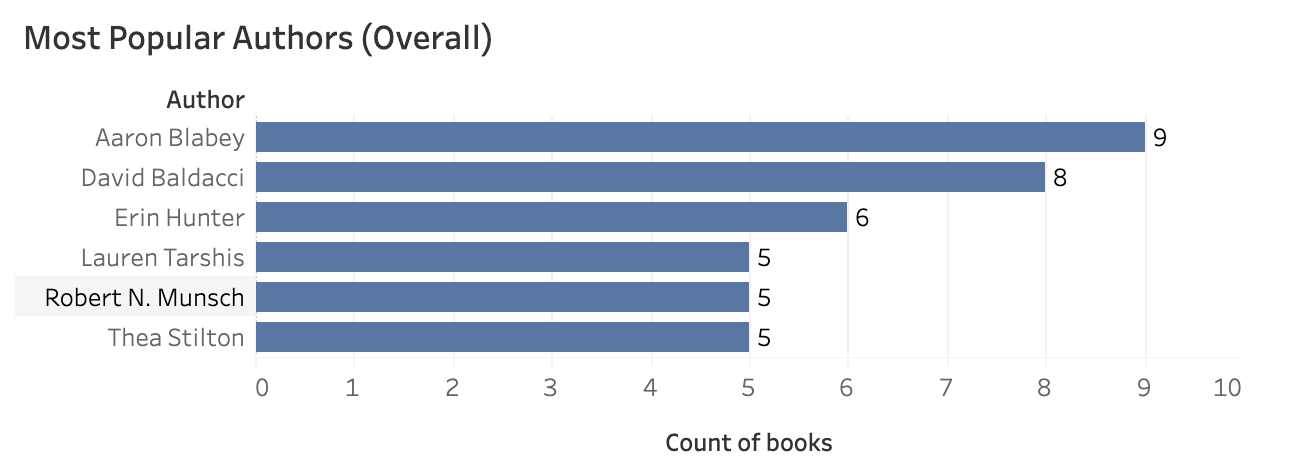

### Digging deeper into Blabey and Baldacci

Let us find out in which categories Blabey and Baldacci come up

In [10]:
%%sql
SELECT 
    ROW_NUMBER() OVER() AS 'No.', 
    Rank AS 'Ranking',
    Book_Name AS 'Book', 
    Author_Name AS 'Author', 
    Category 
FROM most_circulated_books_22
WHERE Author_Name LIKE' David Baldacci'

*  duckdb:///sault_library_2022.db
Done.


No.,Ranking,Book,Author,Category
1,1,A Gambling Man,David Baldacci,Adult Fiction
2,2,Daylight,David Baldacci,Adult Fiction
3,3,Walk the Wire,David Baldacci,Adult Fiction
4,4,One Good Deed,David Baldacci,Adult Fiction
5,6,Long Road to Mercy,David Baldacci,Adult Fiction
6,10,Mercy,David Baldacci,Adult Fiction
7,14,The Fix,David Baldacci,Adult Fiction
8,25,The Fallen,David Baldacci,Adult Fiction


In [11]:
%%sql
SELECT 
    ROW_NUMBER() OVER() AS 'No.', 
    Rank AS 'Ranking',
    Book_Name AS 'Book', 
    Author_Name AS 'Author', 
    Category 
FROM most_circulated_books_22
WHERE Author_Name LIKE' Aaron Blabey'

*  duckdb:///sault_library_2022.db
Done.


No.,Ranking,Book,Author,Category
1,1,The Bad Guys in Alien vs Bad Guys,Aaron Blabey,Easy Read collection
2,2,The Bad Guys in the Furball Strikes Back,Aaron Blabey,Easy Read collection
3,3,The Bad Guys in Intergalactic Gas,Aaron Blabey,Easy Read collection
4,10,The Bad Guys in They’re Bee-hind you!,Aaron Blabey,Easy Read collection
5,17,The Bad Guys in Attack of the Zittens,Aaron Blabey,Easy Read collection
6,19,The Bad Guys in Do-you-think-he-saurus?,Aaron Blabey,Easy Read collection
7,21,The Bad Guys,Aaron Blabey,Easy Read collection
8,22,The Bad Guys in Mission Unpluckable,Aaron Blabey,Easy Read collection
9,7,Pig the Pug,Aaron Blabey,Picture Book Fiction


As seen above, David Baldacci dominates the Adult Fiction list while Aaron Blabey has the majority of his books in the Easy Read collection except for "Pig the Pug"

### Popular authors by category

Let's find the most popular authors in these seven categories - Adult Fiction, Adult Nonfiction, Young Adult Fiction, Juvenile Fiction Paperbacks, Easy Read collection, Picture Book Non-Fiction, Picture Book Fiction

In [12]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Adult Fiction%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
David Baldacci,8,Adult Fiction


In [13]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Adult Nonfiction%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Ontario Ministry of Transportation,2,Adult Nonfiction


In [14]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Young Adult Fiction%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Karen M. McManus,2,Young Adult Fiction


In [15]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Juvenile Fiction Paperbacks%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Erin Hunter,6,Juvenile Fiction Paperbacks


In [16]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Easy Read%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Aaron Blabey,8,Easy Read collection


In [17]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Picture Book Non-Fiction%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Derek Harmening,3,Picture Book Non-Fiction


In [18]:
%%sql
SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
FROM most_circulated_books_22
WHERE Category LIKE 'Picture Book Fiction%'
GROUP BY Author_Name,Category
ORDER BY Count DESC
LIMIT 1

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Robert N. Munsch,5,Picture Book Fiction


We can modify the above queries into a nested query as shown in the example below. The result will be the same

In [19]:
%%sql
--Subquery method

SELECT Author,MAX(Count) AS Count, Category
FROM
   (
    SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
    FROM most_circulated_books_22
    WHERE Category LIKE 'Adult Fiction%'
    GROUP BY Author_Name,Category
    LIMIT 1   
   )    
GROUP BY Author, Category   

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
David Baldacci,8,Adult Fiction


Let's get the popular authors of each category together by joining those subqueries using UNION and then save the result to a virtual table (SQL View) named popular_author

In [20]:
%%sql

/*All the individual subqueries to get each author from each category
are joined using UNION and the result is saved to a SQL view*/

CREATE OR REPLACE VIEW popular_author AS
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Adult Fiction%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category  
    
UNION
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Adult Nonfiction%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category 
    
UNION
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Young Adult Fiction%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category
    
UNION
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Juvenile Fiction Paperbacks%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category
    
UNION
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Easy Read%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category  
    
UNION
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Picture Book Non-Fiction%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category  
    
UNION
    SELECT Author,MAX(Count) AS Count,Category
    FROM
       (
        SELECT Author_Name AS 'Author', COUNT(*) AS 'Count',Category
        FROM most_circulated_books_22
        WHERE Category LIKE 'Picture Book Fiction%'
        GROUP BY Author_Name,Category
        ORDER BY Count DESC   
        LIMIT 1   
       )    
    GROUP BY Author,Category      

*  duckdb:///sault_library_2022.db
Done.


Count


Let us check out the popular_author virtual table

In [21]:
%%sql
SELECT * FROM popular_author
ORDER BY Count DESC

*  duckdb:///sault_library_2022.db
Done.


Author,Count,Category
Aaron Blabey,8,Easy Read collection
David Baldacci,8,Adult Fiction
Erin Hunter,6,Juvenile Fiction Paperbacks
Robert N. Munsch,5,Picture Book Fiction
Derek Harmening,3,Picture Book Non-Fiction
Karen M. McManus,2,Young Adult Fiction
Ontario Ministry of Transportation,2,Adult Nonfiction


Looks like Blabey and Baldacci are popular in the Easy Read collection and Adult Fiction lists respectively

We can visualise this result with a bar chart again using Tableau Public. For this, we save the above results to another CSV file

In [22]:
%%sql
/*Copies query results to a CSV file*/

COPY 
(SELECT * FROM popular_author
ORDER BY Count DESC) 
TO 'popular_authors_by_category.csv' (HEADER, DELIMITER ',');


*  duckdb:///sault_library_2022.db
Done.


Count
7


The bar chart below shows clearly that Blabey and Baldacci dominate their respective categories in terms of popularity

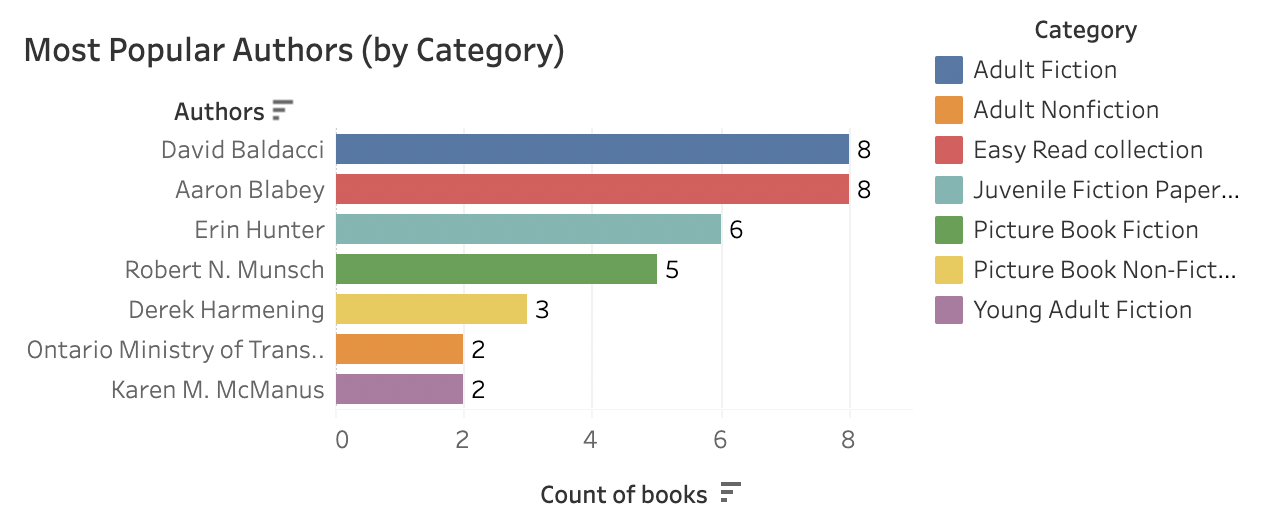

The findings are better visualised in a Tableau public dashboard

Link:
https://public.tableau.com/app/profile/ryan.enoch/viz/WhataretheSaultitesreading2022/WhataretheSaultitesreading?publish=yes

### Conclusion

After analysing the list of top most circulated books, we found that Aaron Blabey's books are the most popular overall. We also found that the books of Blabey and Baldacci are the most popular in the Easy Read collection and Adult Fiction categories respectively. Hope you found this analysis interesting